In [5]:
# install Libery
!pip install mlxtend

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRM/Customer Preference Survey_Responses.csv')
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [10]:
# convert data to 0,1
df = df.replace("ไม่เคยซื้อ",0).replace("ไม่เคยซือ",0).replace("ไม่เคย",0).replace("ไม่",0).replace("เคยซื้อ",1).replace("เคย",1)
df = df.fillna(0)
df['Transaction'] = df.index+1
df = df.drop(columns="Timestamp")
df.head(5)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,Transaction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5


In [11]:
# Check missing
missing = df.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
PS5                              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร    

In [12]:
hot_encoded_df = df.set_index('Transaction')
hot_encoded_df.head(5)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [13]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [14]:
hot_encoded_df.head(5)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
4,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


#1. Market basket (Apriori)

In [15]:
hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1 to 47
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   playstation5                   47 non-null     int64
 1   เครื่องทำขนมปัง                47 non-null     int64
 2   Ergonomic Wrist Rest           47 non-null     int64
 3   เครื่องอบผ้า                   47 non-null     int64
 4   เครื่องชงกาแฟแคปซูล            47 non-null     int64
 5   เก้าอี้ LA-Z-Boy               47 non-null     int64
 6   เครื่องให้อาหารสัตว์อัตโนมัติ  47 non-null     int64
 7   บัตตาเลี่ยน                    47 non-null     int64
 8   แก้วเก็บความเย็น               47 non-null     int64
 9   ลู่วิ่งออกกำลังกาย             47 non-null     int64
 10  Kindle                         47 non-null     int64
 11  เครื่องซักผ้า                  47 non-null     int64
 12  Bluetooth Speaker              47 non-null     int64
 13  ห้องน้ำแมวอัตโนมัติ   

In [51]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.1, use_colnames=True,max_len = 2)

In [76]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by='lift',ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
207,(น้ำพุแมว),(ทรายแมว),0.106383,0.127660,0.106383,1.000000,7.833333,0.092802,inf
206,(ทรายแมว),(น้ำพุแมว),0.127660,0.106383,0.106383,0.833333,7.833333,0.092802,5.361702
6,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.127660,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404
7,(กระติกน้ำ 2 ลิตร),(เครื่องอบผ้า),0.212766,0.127660,0.106383,0.500000,3.916667,0.079221,1.744681
20,(เครื่องชงกาแฟแคปซูล),(Logitech Mx Master 3 Mouse),0.340426,0.127660,0.106383,0.312500,2.447917,0.062924,1.268859
21,(Logitech Mx Master 3 Mouse),(เครื่องชงกาแฟแคปซูล),0.127660,0.340426,0.106383,0.833333,2.447917,0.062924,3.957447
247,(gaming chair),(Mechanical keyboard),0.106383,0.489362,0.106383,1.000000,2.043478,0.054323,inf
246,(Mechanical keyboard),(gaming chair),0.489362,0.106383,0.106383,0.217391,2.043478,0.054323,1.141844
258,(Mechanical keyboard),(ไฟส่องหน้าไลฟ์สด),0.489362,0.127660,0.127660,0.260870,2.043478,0.065188,1.180225
259,(ไฟส่องหน้าไลฟ์สด),(Mechanical keyboard),0.127660,0.489362,0.127660,1.000000,2.043478,0.065188,inf


In [79]:
# กรอง Rule 
# ดูจาก lift ก่อน ค่อยมา confidence
rules = rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) &
        (rules['support'] >= 0.5)].sort_values(by=['lift','confidence'])
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(Bluetooth Speaker),(แก้วเก็บความเย็น),0.723404,0.702128,0.510638,0.705882,1.005348,0.002716,1.012766
70,(แก้วเก็บความเย็น),(Bluetooth Speaker),0.702128,0.723404,0.510638,0.727273,1.005348,0.002716,1.014184
358,(Salmon Sashimi),(External Harddisk),0.829787,0.787234,0.659574,0.794872,1.009702,0.006338,1.037234
359,(External Harddisk),(Salmon Sashimi),0.787234,0.829787,0.659574,0.837838,1.009702,0.006338,1.049645
351,(ยาดม),(ขนมจีนน้ำยาปู),0.808511,0.617021,0.510638,0.631579,1.023593,0.011770,1.039514
350,(ขนมจีนน้ำยาปู),(ยาดม),0.617021,0.808511,0.510638,0.827586,1.023593,0.011770,1.110638
192,(Salmon Sashimi),(Bluetooth Speaker),0.829787,0.723404,0.617021,0.743590,1.027903,0.016750,1.078723
193,(Bluetooth Speaker),(Salmon Sashimi),0.723404,0.829787,0.617021,0.852941,1.027903,0.016750,1.157447
383,(ยาดม),(External Harddisk),0.808511,0.787234,0.659574,0.815789,1.036273,0.023087,1.155015
382,(External Harddisk),(ยาดม),0.787234,0.808511,0.659574,0.837838,1.036273,0.023087,1.180851


In [103]:
# Add thai font 
# ref https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-12-27 15:35:27--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-12-27 15:35:27--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.2’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-12-27 15:35:28 (9.82 MB/s) - 

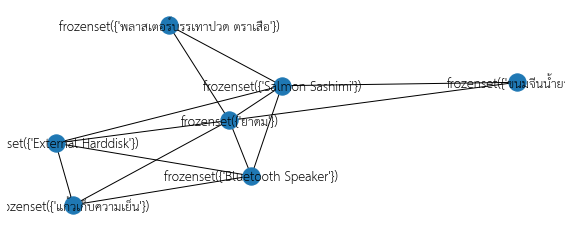

In [102]:
import matplotlib.pyplot as plt
import networkx as nx

#  network มา visulaization ดูว่าอะไรขายคู่กันได้
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()

# Summary Apriori:  จากด้านบนสามารถ ขายสินค้า  TOP 3 product ที่แนะนำ
1. Bluetooth Speake และ แก้วเก็บความเย็น	
(Lift 1 Support 51%%  Confidence 70%)
2. External Harddisk และ Bluetooth Speaker
(Lift 1 Support 59%%  Confidence 82%)
3. พลาสเตอร์บรรเทาปวด ตราเสือ และ ยาดม
(Lift 1 Support 53%%  Confidence 96%)



#2. Assosiation Rule

In [80]:
# hot_encoded_df > column เป็น item
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [81]:
from scipy.spatial.distance import cosine
# loop จับคู่ item  ที่คู่กัน
for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [82]:
# stack = unpivot ทำให้ เป็นแนวตั้ง
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [83]:
# filter และไม่เอา ที่มีชื่อไอเท็มเดียวกัน
links_filtered=links.loc[ (links['value'] > 0.5) &  (links['item'] != links['related item']) ]

In [84]:
links_filtered.sort_values(by=['value']).head(5)

,item,related item,value
899,Mechanical keyboard,airpods,0.500517
1579,airpods,Mechanical keyboard,0.500517
975,หนังสือ python,ขนมจีนน้ำยาปู,0.503362
1335,ขนมจีนน้ำยาปู,หนังสือ python,0.503362
893,Mechanical keyboard,ขนมจีนน้ำยาปู,0.503362


In [88]:
# Add thai font 
# ref https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-12-27 15:29:44--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-12-27 15:29:44--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.009s  

2021-12-27 15:29:44 (10.4 MB/s) - 

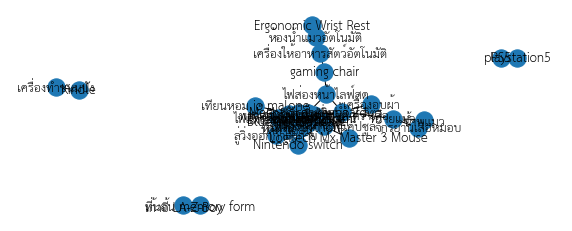

In [87]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()

In [118]:
# กำหนดให้มากขึ้น เพราะอ่านไม่ออก
links_filtered_filter=links.loc[ (links['value'] >= 0.9) &  (links['item'] != links['related item']) ]

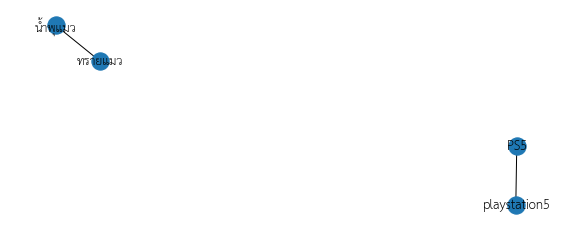

In [119]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered_filter,source='item',target='related item')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()

# Summary Assosiation Rule:  
น้ำพุแมว และทรายแมว ควรขายคู่กัน